## Uber Rider Data Case Study

### Project overview

Uber is interested in predicting rider retention to explore this question, they have provided a sample dataset of a cohort of users who signed up for an account in January 2014. The data was pulled several months later.

### Dataset description
- city: city this user signed up in
- Phone: Primary device for this user
- signup_date: date of account registration; in the form 'YYYYMMDD'
- last_trip_date: the last time this user completed a trip; in the form 'YYYYMMDD'
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider's average rating over all of their trips
- avg_rating_of_driver: the rider's average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- surge_surge: the average surge multiplier over all of this user's trip
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user's trips occuring during a weekday.

### Load data and browse data

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to 
%matplotlib inline

# Always make it pretty
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('raw_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

### Explore data

#### Numeric variables

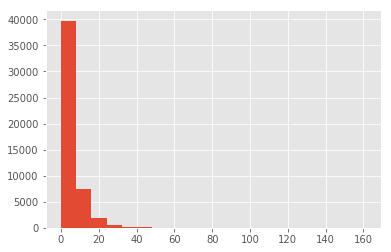

In [7]:
df['avg_dist'].hist(bins=20)

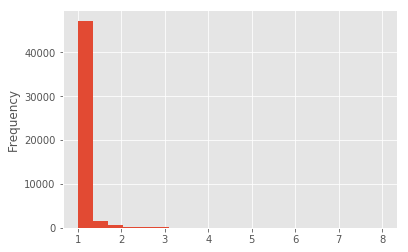

In [8]:
df['avg_surge'].plot.hist(bins=20)

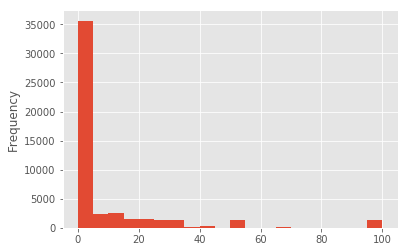

In [9]:
df['surge_pct'].plot.hist(bins=20)

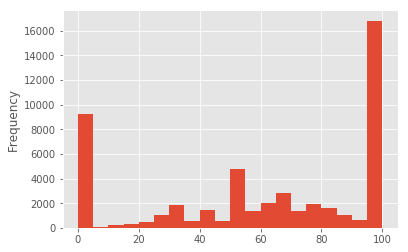

In [10]:
df['weekday_pct'].plot.hist(bins=20)

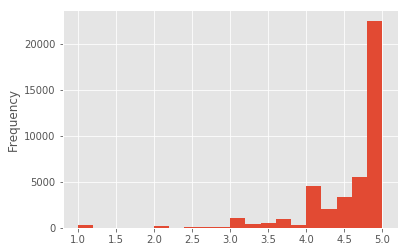

In [11]:
df['avg_rating_of_driver'].plot.hist(bins=20)

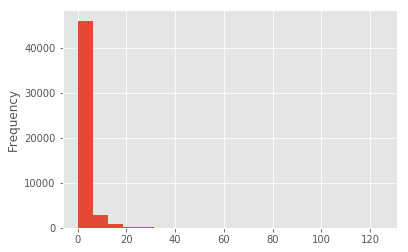

In [12]:
df['trips_in_first_30_days'].plot.hist(bins=20)

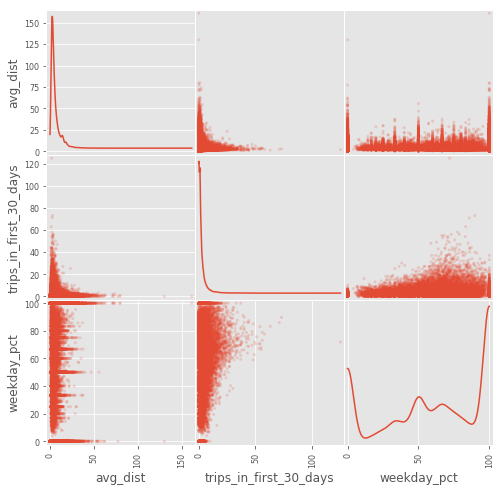

In [13]:
# Use scatter_matrix from Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

#### Categorical variables

In [14]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

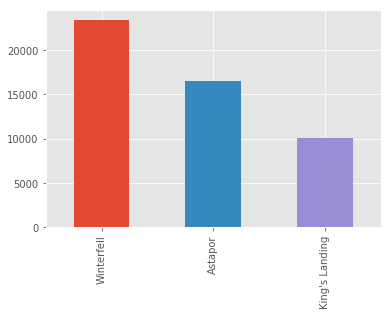

In [15]:
df['city'].value_counts().plot.bar()

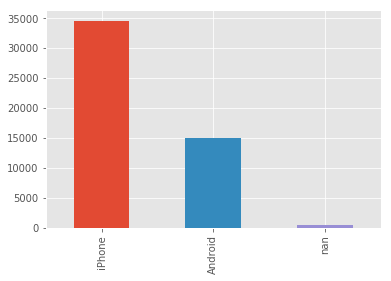

In [16]:
df['phone'].value_counts(dropna=False).plot.bar()

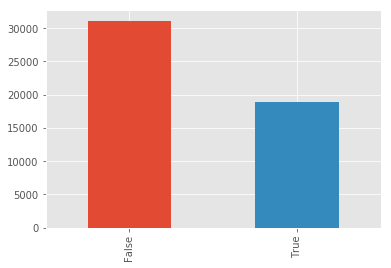

In [17]:
df['luxury_car_user'].value_counts().plot.bar()

### Clean data - dealing with missing values

In [18]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

#### Option 1: drop all rows that have missing values

In [19]:
df_dropna = df.dropna(axis=0)

In [20]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [21]:
df_dropna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Option 2: fill missing values

In [22]:
# Make a copy of df, because you don't want to mess up with orginal df when you are doing experiment 
df_fillna = df.copy()

In [23]:
# Fill missing value for phone
df_fillna['Phone'] = df['phone'].fillna('no_phone')

In [24]:
# Fill missing values with median
df_fillna['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())
df_fillna['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

In [25]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
Phone                     50000 non-null object
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 4.6+ MB


In [26]:
df_fillna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Decision

We decide to exclude data with missing value

In [27]:
df = df_fillna

### Transform data

#### Time-series variables

In [28]:
# convert time-series information to datetime data type
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [29]:
# construct to new df to experiment on the time-series
df_timestamp = df[['last_trip_date', 'signup_date']].copy()

In [30]:
df_timestamp['count'] = 1

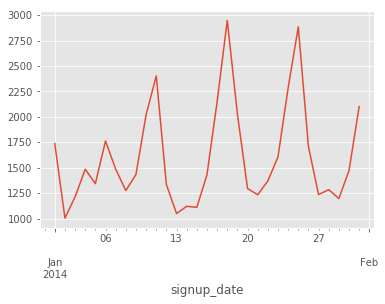

In [31]:
df_timestamp = df_timestamp.set_index('signup_date')
df_timestamp['count'].resample('1D').sum().plot()

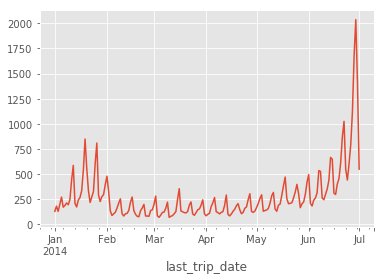

In [32]:
df_timestamp = df_timestamp.set_index('last_trip_date')
df_timestamp['count'].resample('1D').sum().plot()

In [33]:
# Experiment block
date_in_string = '2014-06-01'
date_in_datetime = pd.to_datetime(date_in_string)
print(date_in_datetime)
print(date_in_datetime.dayofweek)

2014-06-01 00:00:00
6


In [34]:
# there maight be some signal from day of week when a user signed up Uber, so let's create a column for that
df['signup_now'] = df['signup_date'].apply(lambda x:x.dayofweek)

In [35]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Phone,signup_now
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,iPhone,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,Android,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,iPhone,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,iPhone,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,Android,0


#### Converting categorical variable

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
Phone                     50000 non-null object
signup_now                50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(3)
memory usage: 5.0+ MB


Categorical variables:

- city
- phone
- luxury_car_user
- signup_now

#### Convert bool columns to int

In [37]:
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

In [38]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Phone,signup_now
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,iPhone,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,Android,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,iPhone,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,iPhone,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,Android,0


#### Encode categorical columns to numeric values

In [39]:
col_category = ['signup_now', 'city', 'phone']

In [40]:
df_dummies = pd.get_dummies(df[col_category], columns= col_category)

In [41]:
df_dummies

,signup_now_0,signup_now_1,signup_now_2,signup_now_3,signup_now_4,signup_now_5,signup_now_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,1,1,0
5,0,0,0,1,0,0,0,0,0,1,0,1
6,0,0,0,0,1,0,0,1,0,0,1,0
7,0,1,0,0,0,0,0,0,0,1,0,1
8,0,1,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,1,0,0,0,0,1,1,0


In [42]:
df = df.join(df_dummies)

In [43]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_now_2,signup_now_3,signup_now_4,signup_now_5,signup_now_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,0,0,1,0,0,1,0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,1,0,0,0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,0,0,0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,0,1,0,0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,0,0,0,0,0,0,1,1,0


In [44]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'Phone',
       'signup_now', 'signup_now_0', 'signup_now_1', 'signup_now_2',
       'signup_now_3', 'signup_now_4', 'signup_now_5', 'signup_now_6',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone'],
      dtype='object')

### Define a label/target/outcome

Add churn indicator. Considered to churn if have not taken a trip in the las 30 days. In practice, you will often have to figure out how to generate a reasonable label to train your dataset. Is the cutoff of 30 days reasonable? You may want to test this? Sometimes, the correct label is even less obvious; you ability to make a sensible(and defensible)decision in these cases is important

In [46]:
# Define churn: users did not take a trip during last 30 days, i.e. last trip date is earlier than 2014-06-01
df['churn'] = (df.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')) * 1

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_now_4,signup_now_5,signup_now_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,churn,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,1,0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,0,0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,0,0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,1,0,0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,0,0,0,0,1,1,0,1,0


In [47]:
df['churn'].mean()

0.62392

In [48]:
df['active'].mean()

0.37608

### EDA with label

#### colored scatter_matrix

In [50]:
colors = ['red' if ix else 'blue' for ix in df['active']]

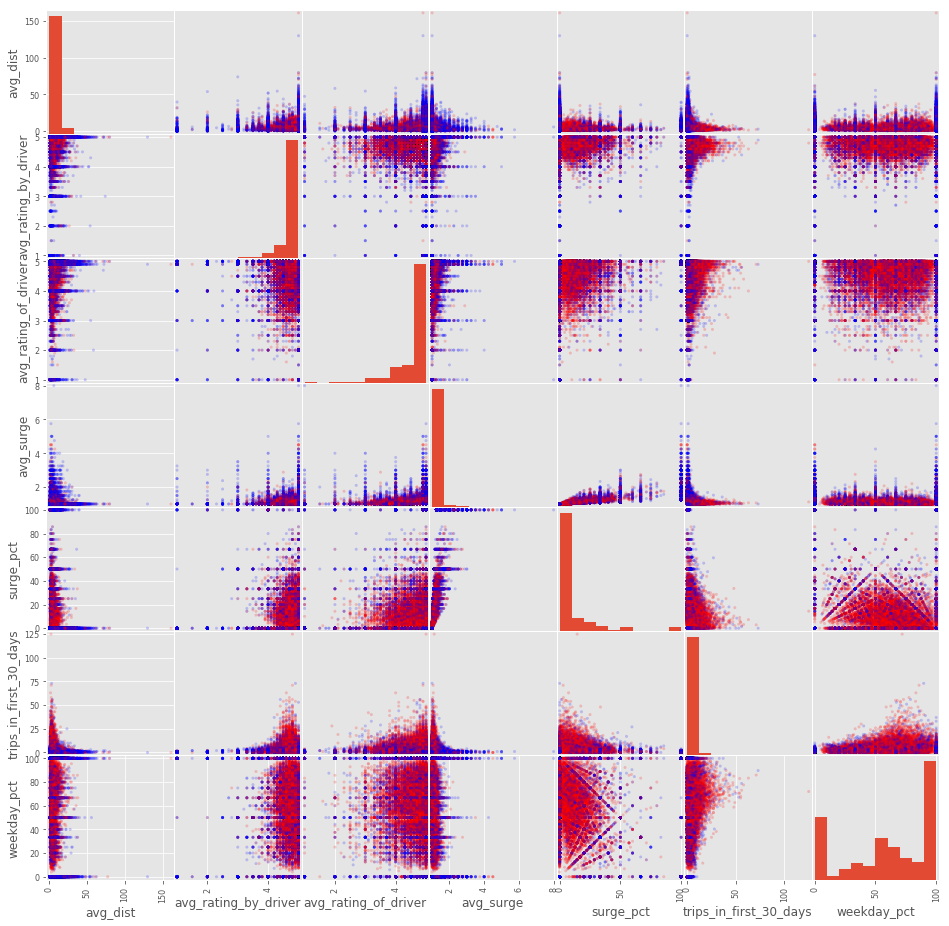

In [51]:
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', 
                  u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
               alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)
plt.show()

#### Explore churn rate split by features

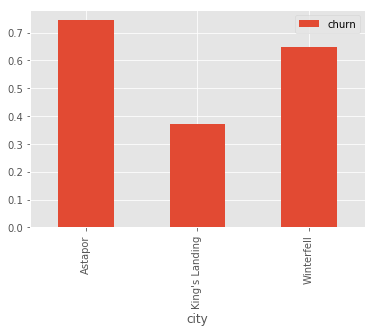

In [52]:
df[['city', 'churn']].groupby(['city']).mean().plot.bar()

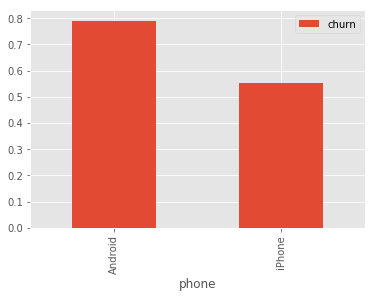

In [53]:
df[['phone', 'churn']].groupby(['phone']).mean().plot.bar()

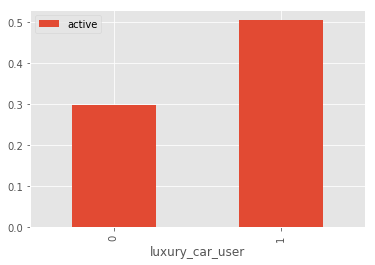

In [54]:
df[['luxury_car_user', 'active']].groupby(['luxury_car_user']).mean().plot.bar()

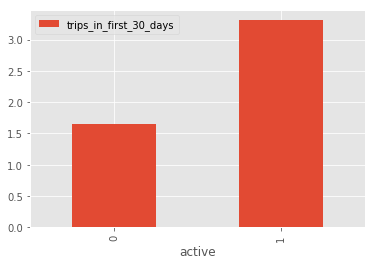

In [55]:
df[['trips_in_first_30_days', 'active']].groupby(['active']).mean().plot.bar()

In [56]:
is_active = df['active'] == 1

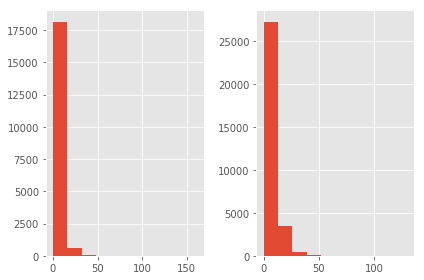

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df[is_active]['avg_dist'].values)
axes[1].hist(df[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

In [59]:
def hist_active_vs_churn(df, col_name):
    is_active = df['active'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title("active users")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title("churned users")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

In [60]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'Phone',
       'signup_now', 'signup_now_0', 'signup_now_1', 'signup_now_2',
       'signup_now_3', 'signup_now_4', 'signup_now_5', 'signup_now_6',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'churn', 'active'],
      dtype='object')

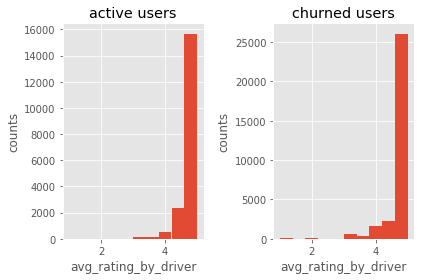

In [61]:
hist_active_vs_churn(df, col_name=u'avg_rating_by_driver')

In [62]:
cols = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge']

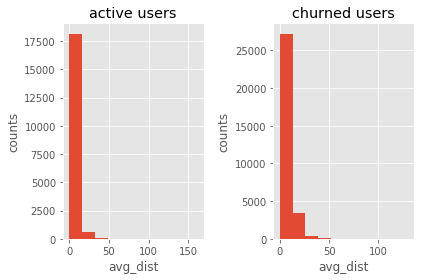

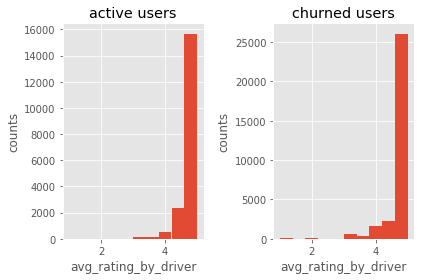

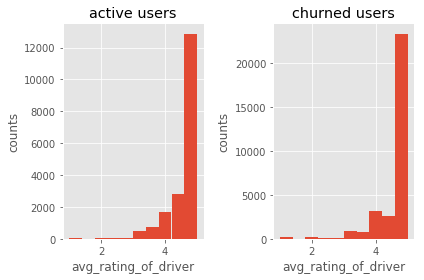

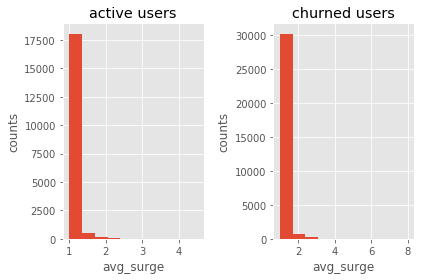

In [63]:
for col in cols:
    hist_active_vs_churn(df, col_name=col)

### Save cleaned data to csv file


#### Select which columns to be saved


In [73]:
selected_columns = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'signup_now_0', 
                     u'signup_now_1', u'signup_now_2', u'signup_now_3', u'signup_now_4', 
                     u'signup_now_5', u'signup_now_6', u'churn']

#### Save to csv file

In [75]:
cleaned_data_csv = 'cleaned_data.csv'
df[selected_columns].to_csv(cleaned_data_csv, index=False)

In [78]:
df.groupby('active')['avg_rating_by_driver'].agg(['mean','count'])

,mean,count
active,,
0,4.788588,31196
1,4.763226,18804


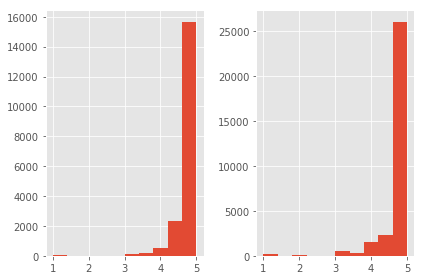

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df[is_active]['avg_rating_by_driver'].values)
axes[1].hist(df[~is_active]['avg_rating_by_driver'].values)
fig.tight_layout()
plt.show()

## Uber _Rider_ Churn_ Supervised _Learning

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [86]:
df = pd.read_csv('churn.csv')

In [87]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0.0,1.0,0.0,0.0,1.0,0.0,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0.0,0.0,1.0,1.0,0.0,0.0,1


In [90]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,0.466720,0.300440,0.691640,0.007920,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,0.498896,0.458454,0.461821,0.088642,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Build Logistic Regression Model


#### Define Feature and Target

In [91]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'

In [92]:
x = df[selected_features].values
y = df['churn'].values

In [93]:
x.shape

(50000, 14)

In [94]:
y

array([0, 1, 1, ..., 1, 1, 1])

#### Split the train data

In [99]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

#### Logistic Regression model using sklearn

In [102]:
# import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

#Initialize model by providing parameter
clf = LogisticRegression(C= 1.0, penalty='l2')

# fit a model by providing x and y from training set
clf.fit(x_train, y_train)

# make prediction on the training data
y_train_pred = clf.predict(x_train)
p_train_pred = clf.predict_proba(x_train)[:, 1]

# make prediction on the test data
y_test_pred = clf.predict(x_test)
p_test_pred = clf.predict_proba(x_test)[:, 1]

#### Calculate the metric scores for the model


In [103]:
# import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [104]:
import pandas as pd
# helper method to print metric scores
  
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.760681  0.764023
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


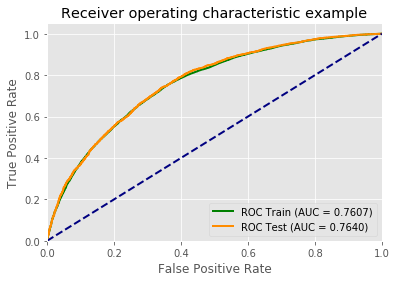

In [109]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### Understanding the Estimated Coefficients

In [111]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.659806
11,phone_Android,0.443715
3,avg_surge,0.198335
1,avg_rating_by_driver,0.145791
10,city_Winterfell,0.135279
2,avg_rating_of_driver,0.132316
0,avg_dist,0.035350
7,weekday_pct,0.000191
4,surge_pct,-0.004126
13,phone_no_phone,-0.049709


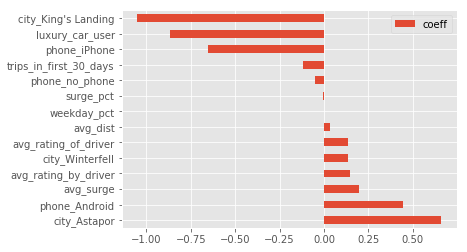

In [114]:
ax = df_coeffs.plot.barh()
t = np.arange(x.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Bagging

#### Single Tree

              train      test
metrics                      
AUC        0.760681  0.810528
Accuracy   0.717475  0.757400
Precision  0.735859  0.798222
Recall     0.853237  0.818909
f1-score   0.790213  0.808433


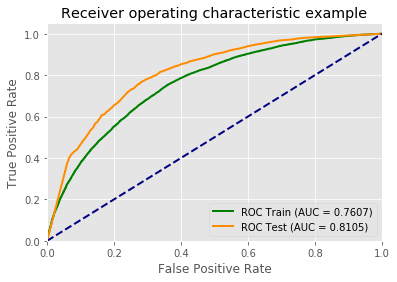

In [116]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)

# fit a model by providing x and y from training set
clf.fit(x_train, y_train)

# make predictions on test data
y_test_pred = clf.predict(x_test)
p_test_pred = clf.predict_proba(x_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [117]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(x_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(x_train)
    p_train_pred = clf.predict_proba(x_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(x_test)
    p_test_pred = clf.predict_proba(x_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


#### Bagged Trees

              train      test
metrics                      
AUC        0.918483  0.852311
Accuracy   0.834650  0.784700
Precision  0.844192  0.804729
Recall     0.901183  0.865622
f1-score   0.871757  0.834066


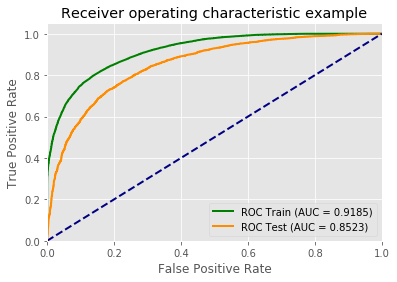

In [119]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, x_train, y_train, x_test, y_test)

#### Single KNN

              train      test
metrics                      
AUC        0.927071  0.771596
Accuracy   0.850175  0.740700
Precision  0.867145  0.779920
Recall     0.897214  0.815230
f1-score   0.881923  0.797184


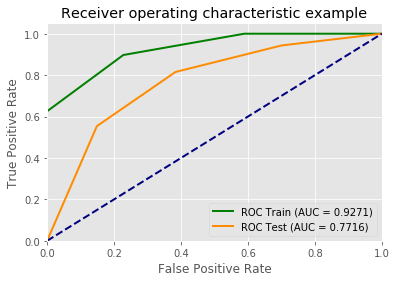

In [120]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, x_train, y_train, x_test, y_test)

#### Bagged KNN

              train      test
metrics                      
AUC        0.955235  0.799339
Accuracy   0.867050  0.745200
Precision  0.881566  0.784715
Recall     0.908920  0.816349
f1-score   0.895034  0.800220


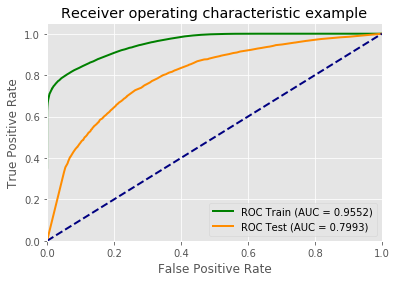

In [121]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, x_train, y_train, x_test, y_test)

#### Random Forest

              train      test
metrics                      
AUC        0.893662  0.856504
Accuracy   0.814400  0.787700
Precision  0.824547  0.802285
Recall     0.892243  0.876340
f1-score   0.857060  0.837679


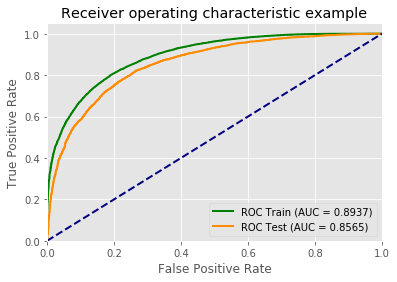

In [123]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
             # 'max_features': 'auto',
             # 'criterion': 'gini',
             # 'max_depth': 20,
             # 'min_samples_split': 2,
              'min_samples_leaf': 10,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(x_train, y_train)

# Train test model
train_test_model(clf, x_train, y_train, x_test, y_test)

#### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.873381  0.861509
Accuracy   0.802925  0.792700
Precision  0.821706  0.811234
Recall     0.873522  0.871061
f1-score   0.846822  0.840083


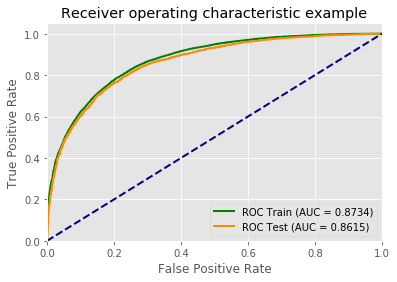

In [124]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, x_train, y_train, x_test, y_test)

#### Neural Network

              train      test
metrics                      
AUC        0.812877  0.812873
Accuracy   0.758450  0.758100
Precision  0.768226  0.767448
Recall     0.877370  0.879539
f1-score   0.819179  0.819679


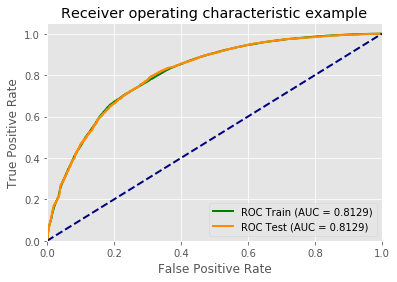

In [125]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, x_train, y_train, x_test, y_test)

### SVM

#### Linear SVM

              train      test
metrics                      
AUC        0.590937  0.592910
Accuracy   0.530525  0.532300
Precision  0.777099  0.780071
Recall     0.346603  0.350664
f1-score   0.479388  0.483832


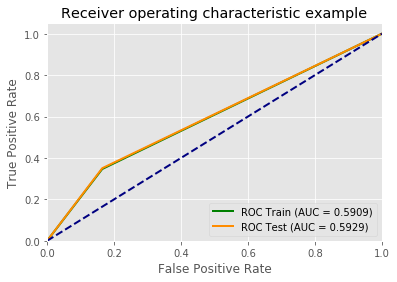

In [126]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(x_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(x_train)

# Make predictions on test data
p_test_pred = clf.predict(x_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### Nonlinear SVM

/Users/tina/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              train      test
metrics                      
AUC        0.620794  0.596260
Accuracy   0.697775  0.682700
Precision  0.685320  0.675645
Recall     0.952936  0.947048
f1-score   0.797270  0.788650


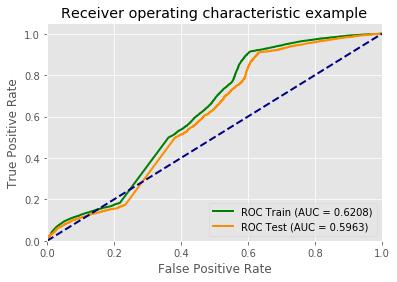

In [127]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, x_train, y_train, x_test, y_test)

#### HyperParameter Tuning: Grid Search

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.944256  0.855513
Accuracy   0.865850  0.787100
Precision  0.870015  0.805968
Recall     0.922750  0.868501
f1-score   0.895607  0.836067


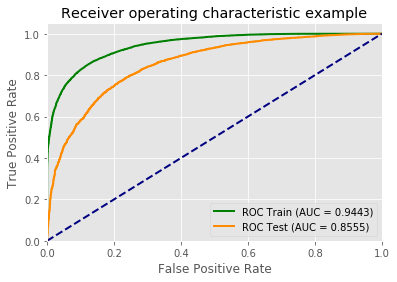

In [129]:
# Train test model
train_test_model(clf, x_train, y_train, x_test, y_test)